___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [1]:
import pandas as pd
from collections import Counter

In [2]:
ri = pd.read_csv("police.csv_2.jptr sonu.csv", index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ri["is_arrested"].mean()

0.05182253697146428

In [4]:
ri.groupby("is_arrested")[["driver_gender"]].count() # tüm sürücüler false=tutuklanmayan ların sayısı

,driver_gender
is_arrested,
False,45522
True,2488


In [5]:
ri["is_arrested"].count()

48010

In [6]:
ri[ri["is_arrested"]==True].groupby("driver_gender")[["is_arrested"]].count() #tutklanan personel

,is_arrested
driver_gender,
F,396
M,2092


In [7]:
ri[ri["is_arrested"]==False].groupby("driver_gender")[["is_arrested"]].count()#tutuklanmayan personel

,is_arrested
driver_gender,
F,12913
M,32609


In [8]:
ri["clock"] = ri.index

In [9]:
ri["clock"]

stop_datetime
2005-01-02 01:55:00    2005-01-02 01:55:00
2005-01-02 20:30:00    2005-01-02 20:30:00
2005-01-04 12:55:00    2005-01-04 12:55:00
2005-01-06 01:30:00    2005-01-06 01:30:00
2005-01-12 08:05:00    2005-01-12 08:05:00
                              ...         
2006-08-08 22:45:00    2006-08-08 22:45:00
2006-08-08 22:45:00    2006-08-08 22:45:00
2006-08-08 22:53:00    2006-08-08 22:53:00
2006-08-08 23:00:00    2006-08-08 23:00:00
2006-08-08 23:00:00    2006-08-08 23:00:00
Name: clock, Length: 48010, dtype: object

In [10]:
ri["clock"] = ri.clock.apply(lambda x : x[11:13])

In [11]:
ri["clock"]

stop_datetime
2005-01-02 01:55:00    01
2005-01-02 20:30:00    20
2005-01-04 12:55:00    12
2005-01-06 01:30:00    01
2005-01-12 08:05:00    08
                       ..
2006-08-08 22:45:00    22
2006-08-08 22:45:00    22
2006-08-08 22:53:00    22
2006-08-08 23:00:00    23
2006-08-08 23:00:00    23
Name: clock, Length: 48010, dtype: object

In [12]:
a=(ri.groupby("clock")[["is_arrested"]].mean())["is_arrested"]

In [13]:
ri["hourly_arrest_rate"] = a

In [14]:
a

clock
00    0.091657
01    0.113384
02    0.113103
03    0.084877
04    0.065217
05    0.037975
06    0.020573
07    0.022004
08    0.023802
09    0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

In [15]:
ri["hourly_arrest_rate"]

stop_datetime
2005-01-02 01:55:00   NaN
2005-01-02 20:30:00   NaN
2005-01-04 12:55:00   NaN
2005-01-06 01:30:00   NaN
2005-01-12 08:05:00   NaN
                       ..
2006-08-08 22:45:00   NaN
2006-08-08 22:45:00   NaN
2006-08-08 22:53:00   NaN
2006-08-08 23:00:00   NaN
2006-08-08 23:00:00   NaN
Name: hourly_arrest_rate, Length: 48010, dtype: float64

In [16]:
len(ri["hourly_arrest_rate"])

48010

In [17]:
ri["hourly_arrest_rate"]=ri["hourly_arrest_rate"].apply(lambda x : a.apply(lambda b: b=x))

SyntaxError: lambda cannot contain assignment (<ipython-input-17-bd9e0fd08691>, line 1)

In [ ]:
ri

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

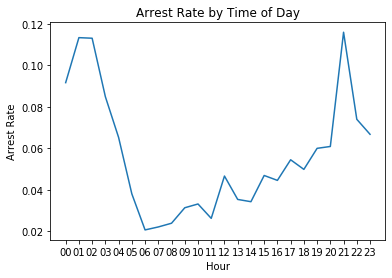

In [22]:
plt.plot(a)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [23]:
ri["year"] = ri.index
ri["year"] = ri.year.apply(lambda x : x[0:4])
aa=(ri.groupby("year")[["drugs_related_stop"]].mean())["drugs_related_stop"]
aa

year
2005    0.008038
2006    0.006257
Name: drugs_related_stop, dtype: float64

In [24]:
ri["drugs_related_stop"]


stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
                       ...  
2006-08-08 22:45:00    False
2006-08-08 22:45:00    False
2006-08-08 22:53:00    False
2006-08-08 23:00:00    False
2006-08-08 23:00:00    False
Name: drugs_related_stop, Length: 48010, dtype: bool

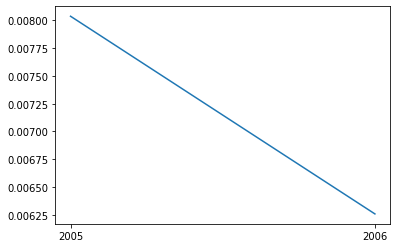

In [32]:
plt.plot(aa)

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [35]:
ri.shape

(48010, 24)

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.